<a href="https://colab.research.google.com/github/Bogdan1packo/community-starter-kit/blob/master/Google_stock_Prediction30days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Descriptions: This program predicts price of Google stock for a specyfic day 
#               using the MLalgoritm called Support Vector Regresion (SVR)

In [0]:
# now import the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [35]:
# Data loading
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('GOOG.csv')
df.head(7)

Saving GOOG.csv to GOOG.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,1301.000000,1305.829956,1281.000000,1289.920044,1289.920044,1510900
1,2019-12-03,1279.569946,1298.461060,1279.000000,1295.280029,1295.280029,1143800
2,2019-12-04,1307.010010,1325.800049,1304.869995,1320.540039,1320.540039,1537500
3,2019-12-05,1328.000000,1329.358032,1316.439941,1328.130005,1328.130005,1212700
4,2019-12-06,1333.439941,1344.000000,1333.439941,1340.619995,1340.619995,1314800
5,2019-12-09,1338.040039,1359.449951,1337.839966,1343.560059,1343.560059,1354300
6,2019-12-10,1341.500000,1349.974976,1336.040039,1344.660034,1344.660034,1094100


In [0]:
# Now Create the lists one for data one for prices
dates = []
prices = []

In [37]:
# checking shape of data set (row and columns)
df.shape

(19, 7)

In [38]:
# checking last row of data - it will be testing data to check our model
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
18,2019-12-27,1362.98999,1364.530029,1349.310059,1351.890015,1351.890015,1038400


In [0]:
 # 18	2019-12-27	1362.98999	1364.530029	1349.310059	1351.890015	1351.890015	1038400

In [39]:
# Gwt allof data except our last row(testing data)
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,1301.000000,1305.829956,1281.000000,1289.920044,1289.920044,1510900
1,2019-12-03,1279.569946,1298.461060,1279.000000,1295.280029,1295.280029,1143800
2,2019-12-04,1307.010010,1325.800049,1304.869995,1320.540039,1320.540039,1537500
3,2019-12-05,1328.000000,1329.358032,1316.439941,1328.130005,1328.130005,1212700
4,2019-12-06,1333.439941,1344.000000,1333.439941,1340.619995,1340.619995,1314800
5,2019-12-09,1338.040039,1359.449951,1337.839966,1343.560059,1343.560059,1354300
6,2019-12-10,1341.500000,1349.974976,1336.040039,1344.660034,1344.660034,1094100
7,2019-12-11,1350.839966,1351.199951,1342.670044,1345.020020,1345.020020,850400
8,2019-12-12,1345.939941,1355.775024,1340.500000,1350.270020,1350.270020,1281000
9,2019-12-13,1347.949951,1353.093018,1343.869995,1347.829956,1347.829956,1549600


In [40]:
#checking new shape
df.shape

(18, 7)

In [0]:
# Getting all of the rows from the "Data" column
df_dates = df.loc[:,'Date']
# Getting all of the rows from the "Open" column
df_open = df.loc[:,'Open']

In [0]:
# creating thr independent data setX
for date in df_dates:
  dates.append( [int(date.split('-')[2])])

In [0]:
#Creating dependent data set Y
for open_price in df_open:
  prices.append(float(open_price))

In [44]:
# printing recorded day
print(dates)

[[2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26]]


In [0]:
def predict_prices(dates, prices, x):
  # ceating the 3 Support Vector Regression models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf= SVR(kernel='rbf', C=1e3, gamma=0.1)
  # Training SVRmodels:
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  # Creating the Linear Regression Model
  lin_reg = LinearRegression()
  #training the Linear Regression Model
  lin_reg.fit(dates, prices)
  # Ploting the model on a graph to see whic has the best fitting
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR POLY')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR LINEAR')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='SVR Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.show()
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


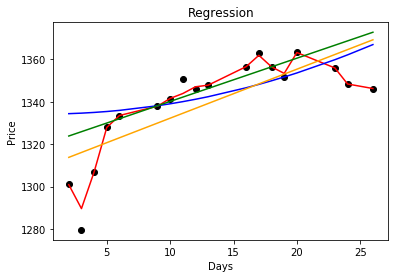

(1341.3460092968548, 1374.859912999957, 1369.5678238313126, 1371.564775695712)


In [45]:
#Predicting price of google stock price on day 2019-12-27	1362.98999
predicted_price = predict_prices(dates, prices,[[27]])
print(predicted_price)